In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score

In [230]:
test= pd.read_csv('C:/Users/박상호/ghost_test.csv')
train=pd.read_csv('C:/Users/박상호/ghost_train.csv')
submission=pd.read_csv('C:/Users/박상호/ghost_train.csv')

In [231]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
id               371 non-null int64
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [232]:
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 6 columns):
id               529 non-null int64
bone_length      529 non-null float64
rotting_flesh    529 non-null float64
hair_length      529 non-null float64
has_soul         529 non-null float64
color            529 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 24.9+ KB


,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


In [233]:
submission.info()
submission.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
id               371 non-null int64
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


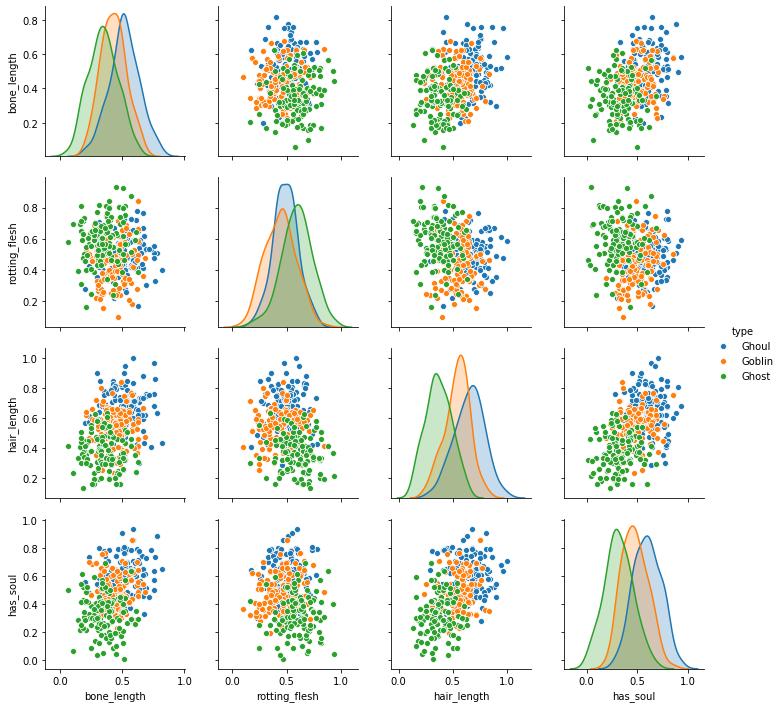

In [234]:
sns.pairplot(train.drop("id",axis=1), hue="type", diag_kind="kde")

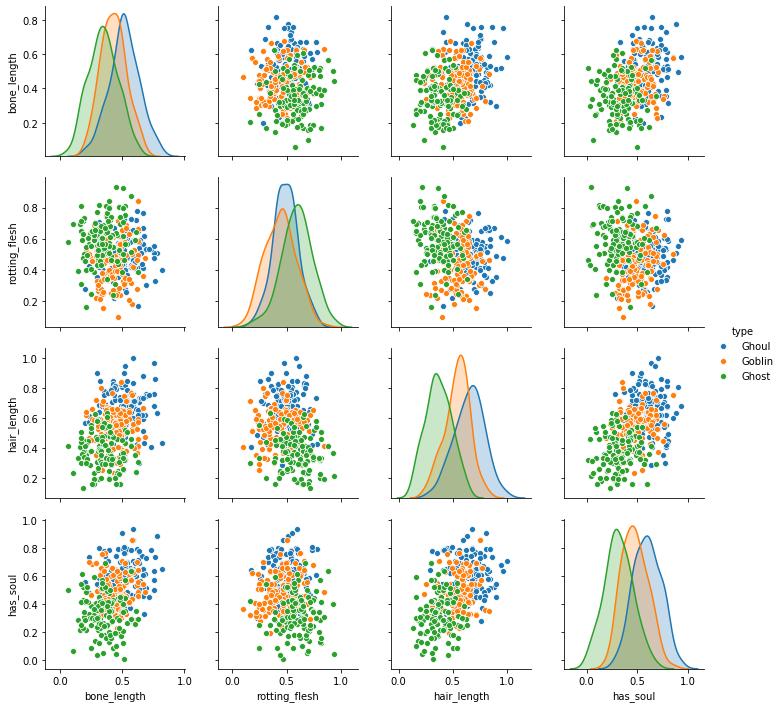

In [235]:
sns.pairplot(submission.drop("id",axis=1), hue="type", diag_kind="kde")

### It seems same stratify between train and submission.

In [238]:
X, y = train.iloc[:, :6].values, train.iloc[:, 6].values

In [239]:
# impute dummy variable to color_variables and drop the first column of dummies 
X=pd.get_dummies(train[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color']], drop_first=True)
X

,bone_length,rotting_flesh,hair_length,has_soul,color_blood,color_blue,color_clear,color_green,color_white
0,0.354512,0.350839,0.465761,0.781142,0,0,1,0,0
1,0.575560,0.425868,0.531401,0.439899,0,0,0,1,0
2,0.467875,0.354330,0.811616,0.791225,0,0,0,0,0
3,0.776652,0.508723,0.636766,0.884464,0,0,0,0,0
4,0.566117,0.875862,0.418594,0.636438,0,0,0,1,0
5,0.405680,0.253277,0.441420,0.280324,0,0,0,1,0
6,0.399331,0.568952,0.618391,0.467901,0,0,0,0,1
7,0.516224,0.536429,0.612776,0.468048,0,0,1,0,0
8,0.314295,0.671280,0.417267,0.227548,0,1,0,0,0
9,0.280942,0.701457,0.179633,0.141183,0,0,0,0,1


In [246]:
Xsub, ysub = submission.iloc[:, :6].values, submission.iloc[:, 6].values

In [248]:
Xsub=pd.get_dummies(submission[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color']], drop_first=True)

# It does not work. Why?
sc = StandardScaler()


X_std = sc.fit_transform(X)

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), 
                                      np.std(scores)))
                                      
params={'learning_rate' : [0.001, 0.01, 0.1, 0.5, 1],
       'n_estimators' : [100, 200, 500],
       'max_depth' : [2,3,5,10]}
clf = GridSearchCV(GradientBoost, param_grid = params, scoring = 'accuracy', cv=10, n_jobs=-1)
clf.fit(X_train, y_train)
print('BestScore:{}'.format(clf.best_score_))
print('BestParam:{}'.format(clf.best_params_))

In [249]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': [2, 5, 7, 10, 20, 30, 50, 70]}],
                  scoring='accuracy',
                  cv=10, iid=False)

scores = cross_val_score(gs, X, y, 
                         scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), 
                                      np.std(scores)))
gs = gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)

CV accuracy: 0.687 +/- 0.088
0.7032389532389531
{'max_depth': 5}


In [250]:
gs = GridSearchCV(estimator=ExtraTreesClassifier(random_state=42),
                  param_grid=[{'n_estimators': [10, 20, 50, 100]}],
                  scoring='accuracy',
                  cv=10, iid=False)

scores = cross_val_score(gs, X, y, 
                         scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), 
                                      np.std(scores)))
gs = gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)

CV accuracy: 0.671 +/- 0.063
0.6948305448305448
{'n_estimators': 100}


In [251]:
gs = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                  param_grid=[{'n_estimators': [10, 20, 50, 100]}],
                  scoring='accuracy',
                  cv=10, iid=False)

scores = cross_val_score(gs, X, y, 
                         scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), 
                                      np.std(scores)))
gs = gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)

CV accuracy: 0.681 +/- 0.075
0.694984984984985
{'n_estimators': 20}


In [252]:
rnd_clf = RandomForestClassifier(n_estimators=20, random_state=42)
det_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)
log_clf = LogisticRegression(solver="liblinear", random_state=42)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('extra', extra_trees_clf)],
    voting='hard')
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
voting_clf.fit(X, y)

C:\python\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gin...
                                        

In [255]:
type_le = LabelEncoder()
y = type_le.fit_transform(y)
ysub = type_le.fit_transform(ysub)


# 인코딩 성공! 남은 과제는 제출하기! 

In [256]:
for clf in (log_clf, det_clf, rnd_clf, svm_clf, extra_trees_clf, voting_clf, bag_clf):
    clf.fit(X, y)
    y_pred = clf.predict(Xsub)
    print(clf.__class__.__name__, accuracy_score(ysub, y_pred))

C:\python\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\python\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression 0.7493261455525606
DecisionTreeClassifier 0.8517520215633423
RandomForestClassifier 0.9892183288409704
SVC 0.7412398921832885
ExtraTreesClassifier 1.0
VotingClassifier 0.9919137466307277
BaggingClassifier 0.816711590296496
